In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, Flatten, Activation, Reshape
from tensorflow.keras import layers
import tensorflow.keras.backend as K
from tensorflow.keras.layers import MaxPool2D, AvgPool2D
from tensorflow.keras.initializers import Zeros
from tensorflow import keras

In [3]:
"""K.clear_session
initializer = Zeros()
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(4,128,256), activation="relu", data_format='channels_first',kernel_initializer=initializer))
model.add(Conv2D(128, (3, 3), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(64, (4, 4), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(64, (4, 4), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(32, (8, 8), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(16, (8, 8), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(8, (16, 16), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(8, (16, 16), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(8, (16, 16), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(4, (16, 16), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(4, (16, 16), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(4, (16, 16), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(4, (8, 8), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(4, (4, 4), activation="relu",kernel_initializer=initializer))
model.add(Conv2D(4, (4, 4), activation="relu",kernel_initializer=initializer))
model.add(Flatten())

model.add(Dense(512, activation="relu", input_shape=(128,),kernel_initializer=initializer))
model.add(Dense(512,activation="relu",kernel_initializer=initializer))
model.add(Reshape((64, 1, 8)))
model.add(Conv2DTranspose(32, (4, 4), activation="relu",padding="same",strides=2,kernel_initializer=initializer))
model.add(Conv2DTranspose(16, (4, 4), activation="relu",padding="same",strides=2,kernel_initializer=initializer))
model.add(Conv2DTranspose(8, (4, 4), activation="relu",padding="same",strides=2,kernel_initializer=initializer))
model.add(Conv2DTranspose(4, (4, 4), activation="relu",padding="same",strides=2,kernel_initializer=initializer))
model.add(Conv2DTranspose(2, (4, 4), activation="relu",padding="same",strides=2,kernel_initializer=initializer))
model.add(Flatten())
#model.add(Dense(4*128*256,activation="relu"))
model.add(Activation("tanh"))
model.add(Reshape((4, 128, 256)))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])"""

K.clear_session
def create_autoencoder():
    # Input layer
    input_img = keras.Input(shape=(128, 256, 4))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 64x128x32
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 32x64x64
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 16x32x128

    # Bottleneck (Dense layer)
    x = layers.Flatten()(x) # Flatten to feed into dense layer
    encoded = layers.Dense(128, activation='relu')(x)

    # Decoder
    x = layers.Dense(16 * 32 * 128, activation='relu')(encoded)  # Expand back to the spatial dimensions before the bottleneck
    x = layers.Reshape((16, 32, 128))(x) # Reshape to match the output of the last max pooling

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # 32x64x128
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # 64x128x64
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # 128x256x32
    decoded = layers.Conv2D(4, (3, 3), activation='sigmoid', padding='same')(x) # Output with 4 channels

    # Autoencoder model
    autoencoder = keras.Model(input_img, decoded)
    return autoencoder

# Create and compile the autoencoder
autoencoder = create_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse',metrics=['accuracy']) # Adjust loss function as needed
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 256, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 256, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 128, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 64, 128)       73856 

In [4]:
"""
K.clear_session
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(128,256,4), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Dense(100, activation="relu", input_shape=(100,)))
model.add(Conv2DTranspose(16, (3, 3), activation="relu", strides=1, padding="valid"))
model.add(Conv2DTranspose(8, (3, 3), activation="relu", strides=1, padding="valid"))
model.add(Conv2DTranspose(4, (3, 3), activation="relu", strides=1, padding="valid"))
model.add(Flatten())
model.add(Activation("tanh"))
model.add(Reshape((4, 128, 256)))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
"""
#model.summary()

'\nK.clear_session\nmodel = Sequential()\n\nmodel.add(Conv2D(256, (3, 3), input_shape=(128,256,4), activation="relu"))\nmodel.add(Conv2D(64, (3, 3), activation="relu"))\nmodel.add(Conv2D(32, (3, 3), activation="relu"))\nmodel.add(Dense(100, activation="relu", input_shape=(100,)))\nmodel.add(Conv2DTranspose(16, (3, 3), activation="relu", strides=1, padding="valid"))\nmodel.add(Conv2DTranspose(8, (3, 3), activation="relu", strides=1, padding="valid"))\nmodel.add(Conv2DTranspose(4, (3, 3), activation="relu", strides=1, padding="valid"))\nmodel.add(Flatten())\nmodel.add(Activation("tanh"))\nmodel.add(Reshape((4, 128, 256)))\n\nmodel.compile(loss=\'categorical_crossentropy\',\n              optimizer=\'rmsprop\',\n              metrics=[\'accuracy\'])\n'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import tensorflow as tf

In [7]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset  # Import Dataset
import os
from PIL import Image

In [8]:
dimm_x = 128
dimm_y = 256
transform = transforms.Compose([
            transforms.CenterCrop((dimm_x,dimm_y)),
            transforms.RandomAffine(0,translate=(2/dimm_y,1/dimm_x)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5, 0.5), (0.5, 0.5, 0.5, 0.5))
        ])

In [9]:
class RGBAImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png') or f.endswith('.jpg')]
        self.real_len = len(self.image_files)

    def __len__(self):
        return self.real_len * 20

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[ idx % self.real_len ])
        # image = Image.open(img_path).convert('RGBA')  # Ensure RGBA format
        image = Image.open(img_path).convert('RGBA')  # Ensure RGBA format
        if self.transform:
            image = self.transform(image)
        return image

In [10]:
dd = RGBAImageDataset("images", transform)

In [11]:
#X = np.ndarray((3000, *dd[0].shape),dtype=np.float32)
X = np.ndarray((3000, 128,256,4),dtype=np.float32)
for i in range(3000):
    #X[i]=dd[i].numpy()
    X[i]=np.moveaxis(dd[i].numpy(), 0, -1)

In [12]:
len(X)
X.shape

(3000, 128, 256, 4)

In [13]:
ggg= dd[0]
print(type(X[0]))
autoencoder.fit(X,X,
         batch_size=2,
          epochs=1000,
          validation_split=0.1)

<class 'numpy.ndarray'>
Epoch 1/1000
1350/1350 [==============================] - 13s 8ms/step - loss: 0.9771 - accuracy: 0.9503 - val_loss: 0.9752 - val_accuracy: 0.9537
Epoch 2/1000
1350/1350 [==============================] - 11s 8ms/step - loss: 0.9751 - accuracy: 0.9542 - val_loss: 0.9752 - val_accuracy: 0.9537
Epoch 3/1000
1350/1350 [==============================] - 11s 8ms/step - loss: 0.9751 - accuracy: 0.9542 - val_loss: 0.9752 - val_accuracy: 0.9537
Epoch 4/1000
1350/1350 [==============================] - 11s 8ms/step - loss: 0.9751 - accuracy: 0.9542 - val_loss: 0.9752 - val_accuracy: 0.9537
Epoch 5/1000
1350/1350 [==============================] - 10s 8ms/step - loss: 0.9751 - accuracy: 0.9542 - val_loss: 0.9752 - val_accuracy: 0.9537
Epoch 6/1000
1350/1350 [==============================] - 11s 8ms/step - loss: 0.9751 - accuracy: 0.9542 - val_loss: 0.9752 - val_accuracy: 0.9537
Epoch 7/1000
1350/1350 [==============================] - 11s 8ms/step - loss: 0.9751 - accura

KeyboardInterrupt: 

In [14]:
res=autoencoder.predict(X[99:100,:,:,:])

1/1 [==============================] - 1s 620ms/step


In [15]:
res.shape

(1, 128, 256, 4)

In [16]:
res[0][2][64]

array([0., 0., 0., 0.], dtype=float32)

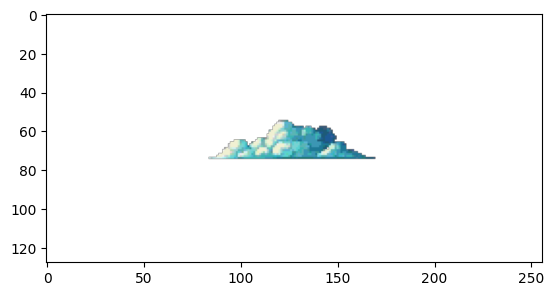

In [17]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(X[99:100,:,:,:][0]))

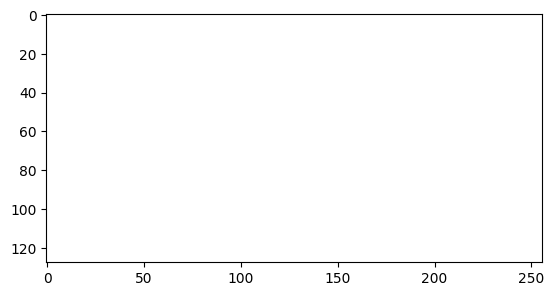

In [18]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(res[:1,:,:,:][0]))